# Stochastic production and degradation model

This example introduces the stochastic production and degradation model.
This model describes two stochastic chemical reactions: one, which increases the concentration of a substance by a unit; and, another, which decreases it by the same amount. Given an initial concentration of the substance, $n_0$, the substance degrades with rate $k_1$ while its concentration increases at rate $k_2$ following a rate constant, $k$, according to the following model ([Erban et al., 2007](https://arxiv.org/abs/0704.1908)):
   $$A \xrightarrow{k_1} \emptyset$$
   $$\emptyset \xrightarrow{k_2} A$$

The model is simulated according to the Gillespie stochastic simulation algorithm [(Gillespie, 1976)](https://doi.org/10.1016/0021-9991%2876%2990041-3), which allows exact simulation of stochastic processes.

We choose the initial count of species $A$ size to be zero and set $k_1=0.1$ and $k_2=1$. We then perform a single simulation of this stochastic model.

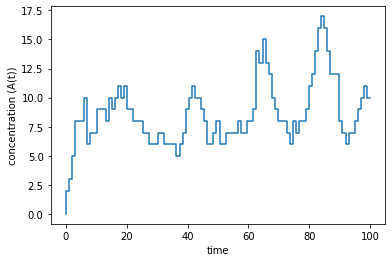

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pints
import pints.toy as toy
import pints.toy.stochastic

n_0 = 0
model = toy.stochastic.ProductionDegradationModel(n_0)

# set parameters
k_1 = 0.1
k_2 = 1.0
k = [k_1, k_2]

# perform a simulation
times = np.linspace(0, 100, 100)
values = model.simulate(k, times)

# plot the result
plt.step(times, values)
plt.xlabel('time')
plt.ylabel('concentration (A(t))')
plt.show()

Given the stochastic nature of this model, every iteration will likely return a different result. However, we can compute the expected value of this process $M(t)$. This function is described by the solution of the following Ordinary Differential Equation (ODE; [Erban et al., 2007](https://arxiv.org/abs/0704.1908)):

$ \frac{\text{d}M}{\text{d}t} = -k_1 M + k_2 $.

We plot the ODE solution and compare it to 500 stochastic simulations, indicating the correspondence between the two processes.

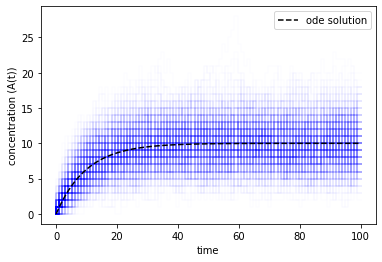

In [2]:
# ode right-hand side
def pend(y, t):
    dydt = [-k[0] * y[0] + k[1]]
    return dydt

x_0 = [0]
times = np.linspace(0, 100, 100)

# solve ODE
from scipy.integrate import odeint
sol = odeint(pend, x_0, times)

# perform 10 simulations of the stochastic process
for i in range(500):
    values = model.simulate(k, times)
    plt.step(times, values, color='blue', alpha=0.01)

# plot ODE overlaid
plt.xlabel('time')
plt.ylabel('concentration (A(t))')
plt.plot(times, sol,'--', color='black', label='ode solution')
plt.legend()
plt.show()